Penjelasan Langkah-Langkah SVM Classification
Preprocessing Data

Tujuan: Mengonversi data kategorikal menjadi numerik dan melakukan standarisasi agar sesuai untuk SVM.
Langkah:
Gunakan LabelEncoder untuk semua fitur dan target.
Standarisasi data fitur menggunakan StandardScaler karena SVM sensitif terhadap skala fitur.
Membangun Model

Tujuan: Melatih model klasifikasi menggunakan Support Vector Machine (SVM) dengan kernel RBF.
Langkah:
Gunakan SVC dengan kernel rbf untuk menangkap pola non-linear.
Aktifkan probabilitas prediksi dengan probability=True.
Prediksi

Tujuan: Membuat prediksi label (y_pred) dan probabilitas kelas positif (y_pred_proba).
Evaluasi

Hitung metrik evaluasi:
Akurasi: 75.5%
Presisi: 74.2%
Recall: 75.5%
F1-Score: 74.4%
AUC: 77.5%
Visualisasi ROC Curve untuk melihat performa prediksi.
Hasil:

SVM memberikan performa yang cukup baik dengan AUC 77.5%, menunjukkan kemampuan memisahkan kelas secara efektif.

Dataset loaded successfully.
Model training completed.

Evaluation Metrics:
Accuracy: 0.7550
Precision: 0.7422
Recall: 0.7550
F1-Score: 0.7437
AUC: 0.7754


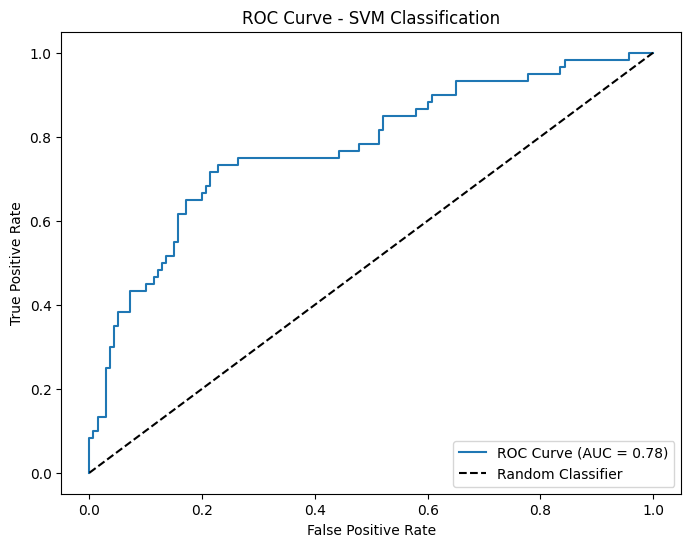

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 1: Load Dataset
try:
    # Load the CreditDataset.csv file
    file_path = 'CreditDataset.csv'  # Make sure this file is in the same directory or provide the correct path
    credit_data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"File {file_path} not found. Please check the file path.")
    exit()

# Step 2: Preprocessing Data
# Separate features and target
X = credit_data.drop(columns=["Class"])  # Features
y = credit_data["Class"]  # Target

# Convert categorical features to numerical using Label Encoding
encoder = LabelEncoder()
X_encoded = X.apply(encoder.fit_transform)  # Encoding categorical data

# Encode the target variable
y_encoded = encoder.fit_transform(y)

# Standardize the features for SVM (SVM is sensitive to feature scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Step 3: Build SVM Model
# Initialize the SVM model with a radial basis function (RBF) kernel
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)
print("Model training completed.")

# Step 4: Predictions
# Predict labels and probabilities
y_pred = svm_model.predict(X_test)  # Predicted labels
y_pred_proba = svm_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Step 5: Evaluation Metrics
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
# Precision
precision = precision_score(y_test, y_pred, average='weighted')
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
# F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')
# AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)

# Display evaluation metrics in a formatted manner
metrics_svm = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "AUC": auc
}

print("\nEvaluation Metrics:")
for metric, value in metrics_svm.items():
    print(f"{metric}: {value:.4f}")

# Step 6: Visualize ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM Classification")
plt.legend(loc="lower right")
plt.show()


